In [2]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [3]:
ca = pd.read_excel('Historical.xlsx')
ca['Log State Highway VMT'] = np.log(ca['State Highway VMT'])
ca['Log State Highway Lane Miles'] = np.log(ca['State Highway Lane Miles'])
ca['Log Population'] = np.log(ca['Population'])
ca['Log Per Capita Income'] = np.log(ca['Per Capita Income'])
ca['Log Total Personal Income'] = np.log(ca['Total Personal Income'])
ca['Log Unemployment Rate'] = np.log(ca['Unemployment Rate'])

# ca = ca[ca['Year'] >= 1976]
# ca = ca[(ca['Year'] >= 1976) & (ca['Year'] <= 1997)]
ca.columns = ca.columns.str.replace(' ', '_')
print(ca.to_string())

      Year  Non-State_Roads_VMT  State_Highway_VMT  California_VMT  State_Highway_Maintained_Miles  State_Highway_Lane_Miles  Population  Per_Capita_Income  Total_Personal_Income  Unemployment_Rate  Gallons_of_Motor_Fuel  National_Fuel_Economy  National_Retail_Fuel_Prices  VMT_Proportion  VMT_Prediction  Log_State_Highway_VMT  Log_State_Highway_Lane_Miles  Log_Population  Log_Per_Capita_Income  Log_Total_Personal_Income  Log_Unemployment_Rate
0   1950.0                  NaN                NaN             NaN                    13721.800000              30708.300000   10677.000             1947.0           2.078812e+07                NaN           3.202276e+09                    NaN                          NaN             NaN             NaN                    NaN                     10.332288        9.275847               7.574045                  16.849892                    NaN
1   1951.0                  NaN                NaN             NaN                    13715.700000        

In [4]:
ca = ca[ca['Year'] >= 1963]

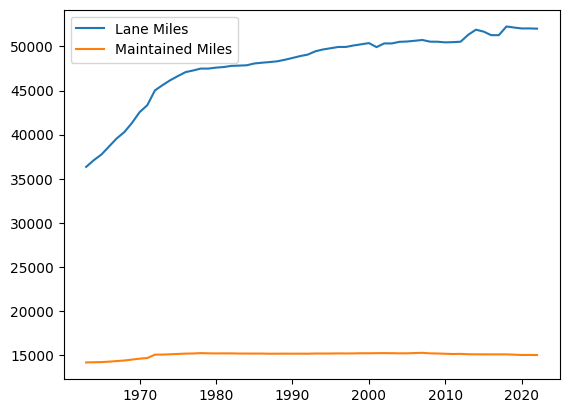

In [7]:
plt.plot(ca['Year'], ca['State_Highway_Lane_Miles'], label = 'Lane Miles')
plt.plot(ca['Year'], ca['State_Highway_Maintained_Miles'], label = 'Maintained Miles')
# plt.ylim(30000, 55000)
plt.legend()

In [5]:
ca['Poly'] = np.log(ca['State_Highway_Lane_Miles']**2)
ca['Interaction'] = ca['Log_Population'] * ca['Log_State_Highway_Lane_Miles']

coef: [ 2.93354002  1.52526824 -0.42159507]
int: -16.90924
r^2: 0.99597


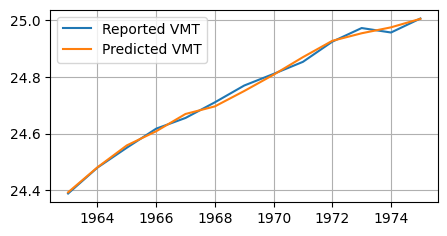

Coefficients of Entire CA


,total_pop_coef,total_lane_miles_coef,total_income_coef,r^2
0,2.93354,1.525268,-0.421595,0.99597


In [45]:
ca = ca[(ca['Year'] >= 1963) & (ca['Year'] <= 1975)]

coef_list = []
r2_list = []

X = ca[['Log_Population',
        'Log_State_Highway_Lane_Miles',
        'Log_Per_Capita_Income',
        # 'Poly'
        ]]

logmodel = LinearRegression()
logmodel.fit(X, ca['Log_State_Highway_VMT'])

coef_list.append(logmodel.coef_.tolist())
r2_list.append(round(logmodel.score(X, ca['Log_State_Highway_VMT']), 5))

print('coef:', logmodel.coef_)
print('int:', round(logmodel.intercept_, 5))
print('r^2:', round(logmodel.score(X, ca['Log_State_Highway_VMT']), 5))

plt.figure(figsize=(5,2.5))
plt.plot(ca['Year'], ca['Log_State_Highway_VMT'], label = 'Reported VMT')
plt.plot(ca['Year'], logmodel.predict(X), label = 'Predicted VMT')
plt.grid()
plt.legend()
plt.show()

coef_df = pd.DataFrame(coef_list, columns=['total_pop_coef', 'total_lane_miles_coef', 'total_income_coef'])
coef_df['r^2'] = r2_list

print('Coefficients of Entire CA')
coef_df

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('State_Highway_VMT ~ State_Highway_Lane_Miles + Population + Per_Capita_Income', data=ca, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,46055.268706,Intercept
1,18.606486,State_Highway_Lane_Miles
2,20.669301,Population
3,15.416844,Per_Capita_Income


coef: [-7055862.35186221  9921164.6392183    -51305.41004241]
int: 185608887226.54236
r^2: 0.99073


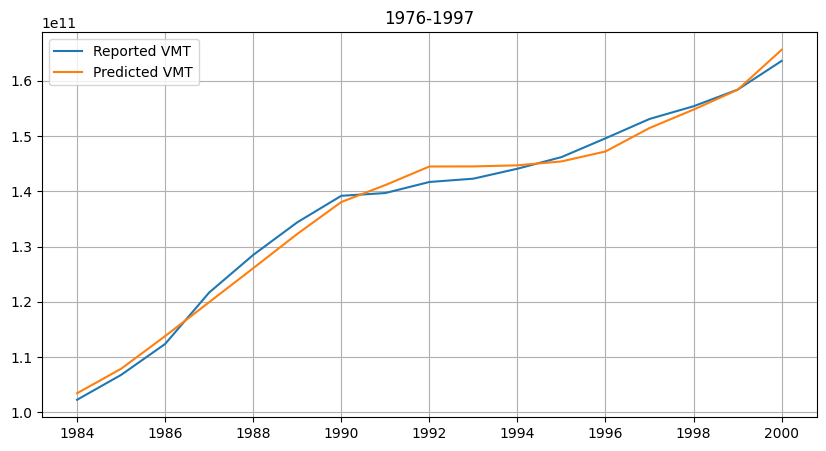

In [9]:
ca =ca = ca[ca['Year'] >= 1966]
X = ca[['State_Highway_Lane_Miles',
        'Population', 
        'Per_Capita_Income'
        # 'Total_Personal_Income',
        # 'Unemployment_Rate'
        ]]

model = LinearRegression()
model.fit(X, ca['State_Highway_VMT'])
print('coef:', model.coef_)
print('int:', round(model.intercept_, 5))
print('r^2:', round(model.score(X, ca['State_Highway_VMT']), 5))

plt.figure(figsize=(10,5))
plt.plot(ca['Year'], ca['State_Highway_VMT'], label = 'Reported VMT')
plt.plot(ca['Year'], model.predict(X), label = 'Predicted VMT')
plt.grid()
plt.title('1976-1997')
plt.legend()
plt.show()


In [10]:
y, X = dmatrices('State_Highway_VMT ~ State_Highway_Lane_Miles + Population + Per_Capita_Income + Total_Personal_Income', data=ca, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,63387.712027,Intercept
1,19.031379,State_Highway_Lane_Miles
2,32.627787,Population
3,2467.430352,Per_Capita_Income
4,2860.759697,Total_Personal_Income
